<a href="https://colab.research.google.com/github/KabyZon/pattern-recognition/blob/master/expectation_maximization_Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import sys 
from sklearn import datasets
from sklearn.cluster import KMeans

#Datasets


In [ ]:
#importado desde pc
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['faithful.csv']))
X = df.values

In [ ]:
#dataset iris de scikit
iris = datasets.load_iris()
X = iris.data


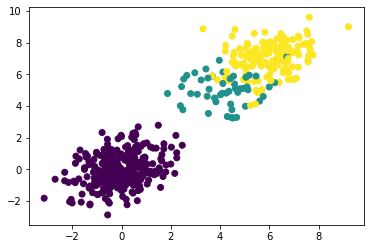

In [9]:
#Dataset Sintetico

mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 300) 
 
mean_02 = np.array([4.0, 5.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
np.random.seed(42)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 50) 
 
mean_03 = np.array([6.0, 7.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
np.random.seed(42)
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 150) 
 
distTodas = [dist_01.shape[0],dist_02.shape[0],dist_03.shape[0]]

dataSintetico = np.vstack((dist_01, dist_02, dist_03)) 
labelOriginal = np.zeros((dataSintetico.shape[0], ) ,dtype=np.float64)
clase = 0
count = 0
for d in distTodas:
  for i in range(count,d+count):
    labelOriginal[i] = clase
    count = count + 1
  clase = clase +1
np.random.seed(42)
np.random.shuffle(dataSintetico)
np.random.seed(42) 
np.random.shuffle(labelOriginal)
   
# function to plot the selected centroids 
def plot(data, centroids): 
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
      
    plt.legend() 
    plt.xlim(-5, 12) 
    plt.ylim(-10, 15) 
    plt.show() 
 
plt.scatter(dataSintetico[:, 0], dataSintetico[:, 1],c = labelOriginal)    


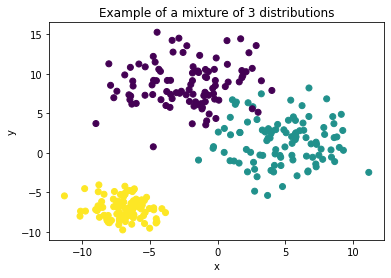

In [3]:
#dataset isotropica

from sklearn.datasets.samples_generator import make_blobs
n_components = 3
varInicial = [3, 3, 1.5]
centers = [[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959]]
X, truth = make_blobs(n_samples=300, centers=centers, 
                      cluster_std = varInicial)   
plt.scatter(X[:, 0], X[:, 1], c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Expectation Maximization for Gaussian Mixture

In [24]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    dif = (X - mu).T
    exponente = np.exp(-0.5 * np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif))
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * exponente).reshape(-1, 1)

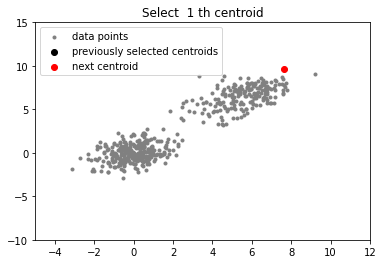

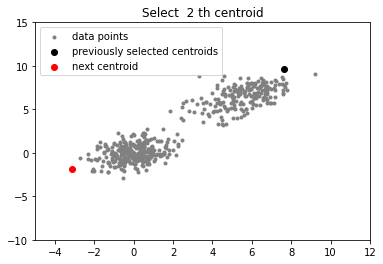

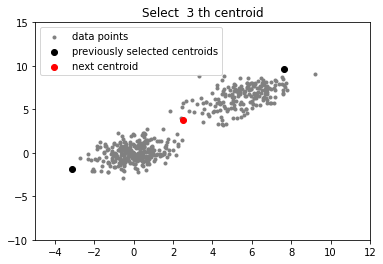

In [11]:
#INICIALIZACION K MEANS++ from geeks for
# function to compute euclidean distance 
def distance(p1, p2): 
    return np.sum((p1 - p2)**2) 
   
def initPP(data, k): 
    ''' 
    initialized the centroids for K-means++ 
    inputs: 
        data - numpy array of data points having shape (200, 2) 
        k - number of clusters  
    '''
    ## initialize the centroids list and add 
    ## a randomly selected data point to the list 
    centroids = [] 
    centroids.append(data[np.random.randint( 
            data.shape[0]), :]) 
    plot(data, np.array(centroids)) 
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
        plot(data, np.array(centroids)) 
    return centroids 
   
# call the initialize function to get the centroids 
centroids = initPP(dataSintetico, k = 3) 

In [12]:
def kDatosAleatorios(X,cant_clases):
  datosAleatorios = np.zeros(shape=(3,2))
  for i in range(cant_clases):
    #datosAleatorios.append(X[random.randint(0,X.shape[0])])
    datosAleatorios[i] = X[random.randint(0,X.shape[0])]
  #print(datosAleatorios)
  return datosAleatorios

In [39]:
#inicializar 
import random
def inicializar(X, cant_clases):
    clusters = []

    muInit  = kDatosAleatorios(X,cant_clases-1)       #inicializacion de k datos aleatorios
    
    #kmeans = KMeans(n_clusters= cant_clases).fit(X) #inicializacion k means scikit
    #muInit = kmeans.cluster_centers_  
    
    #muInit = initPP(X,cant_clases)                   #inicializacion k-means++

    for i in range(cant_clases):
        clusters.append({
            'pi_k': 1.0 / cant_clases,
            'mu_k': muInit[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [14]:
def expectation(X,clusters):
    totales = np.zeros((X.shape[0], 1) ,dtype=np.float64)
    for cluster in clusters:
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        cluster['resp'] = (pi_k * gaussian(X, mu_k, cov_k)).astype(np.float64)
        
        for j in range(0,X.shape[0]):
                totales[j] += cluster['resp'][j]
                
    for cluster in clusters:
        cluster['resp'] /= totales

In [15]:
def maximization(X,clusters):
        
    for cluster in clusters :
        Nk = (cluster['resp'].sum(axis = 0))
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        mu_k = cluster['mu_k']
        
        cluster['pi_k'] = Nk/ X.shape[0]
        
        cluster['mu_k'] = ((cluster['resp']*X).sum(axis = 0))/Nk
        
        for i in range(0,X.shape[0]):
            dif =(X[i] - mu_k).reshape(-1, 1)                                    # utilizo el mu previo
            cov_k += cluster['resp'][i]*( np.dot(dif,dif.T))
        
        cluster['cov_k'] = cov_k / Nk

In [16]:
import math
def log_mv (X,clusters):
    res_log = 0
    for dato in X:
        res = 0
        for cluster in clusters:
            d = np.array([dato])
            res += cluster['pi_k'] * gaussian(d,cluster['mu_k'],cluster['cov_k'])
        res_log += math.log(res)
    return res_log
    

In [37]:
def train(X,cant_clases,cant_iteraciones,truth):
    
    clusters= inicializar(X,cant_clases)
    
    logs = []
    itConv = -1
    for i in range(0,cant_iteraciones):
        
        expectation(X,clusters)

        logs.append( log_mv(X,clusters) )
        
        maximization(X,clusters)
       
        if (i%5 ==0):  
            means = []
            covs = []
            for cluster in clusters:
                means.append(cluster['mu_k'])
                covs.append(cluster['cov_k'])
            ploterMixtura(X,truth,means,covs)

        if (len(logs) >1 and (abs(logs[len(logs)-1] -logs[len(logs)-2] )< 10**-5)) :
          print(f"Convergio en {i} iteraciones ")
          itConv = i
          break
        
        elif (i == cant_iteraciones -1):
          print("No convergio ")
    
    return clusters,logs

In [30]:
#PLOTEAR LOG 
import math
import matplotlib.pyplot as plt

def plotear(log):
    eje_x = np.linspace(0, len(log), len(log))
    plt.plot(eje_x, log)
    plt.title('Log Likelihood')
    plt.show()

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
def ploterMixtura(X,truth,means,covs):

    x = X[:, 0]
    y = X[:, 1]
   
    xmin = min(x)
    xmax = max(x) 
    ymin = min(y) 
    ymax = max(y) 

    x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
    pos = np.dstack((x, y))
    
    #esta hecho para tres clases
    rv0 = multivariate_normal(means[0], covs[0])
    rv1 = multivariate_normal(means[1], covs[1])
    rv2 = multivariate_normal(means[2],covs[2])
    fig2 = plt.figure()
    
    ax2 = fig2.add_subplot(111)
    
    ax2.contour(x, y, rv0.pdf(pos))
    ax2.contour(x, y, rv1.pdf(pos),cmap ="plasma" )
    ax2.contour(x, y, rv2.pdf(pos),cmap = "RdGy")
    
    plt.scatter(X[:, 0], X[:, 1] , c = truth)  # parametro truth por si uso makeblobs y conozco su label 

In [ ]:
import math
def etiquetar (X,clusters):
    res_log = 0
    Probs = []
    i = 0
    for dato in X:
        probsDatoPorClase = []
        for cluster in clusters:
            d = np.array([dato])
            ProbClase =  cluster['resp'][i][0]
            probsDatoPorClase.append(ProbClase)
        Probs.append(probsDatoPorClase)
        i = i +1  
    return Probs



#Training

Convergio en 62 iteraciones 
INICIALIZACION ALEATORIA


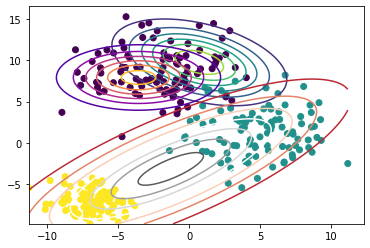

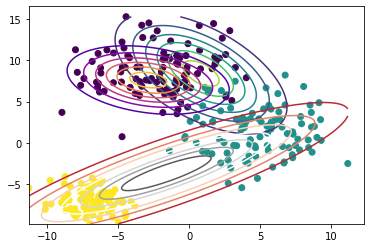

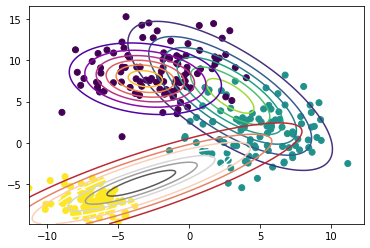

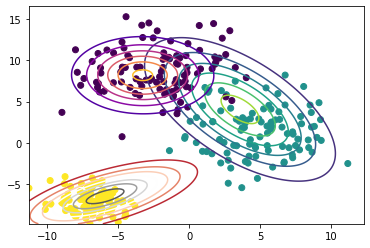

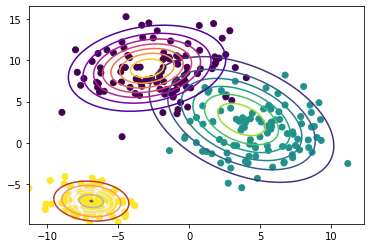

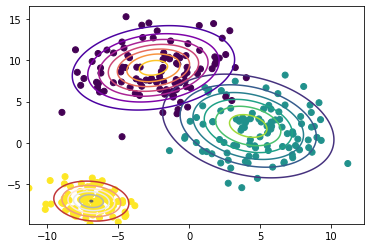

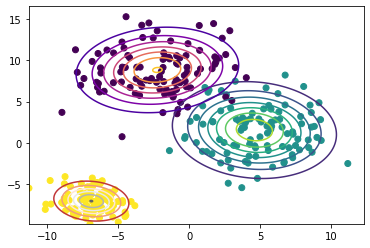

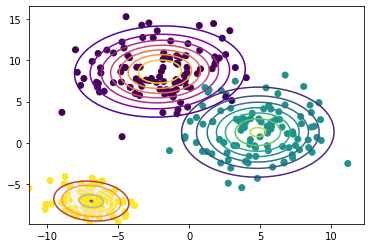

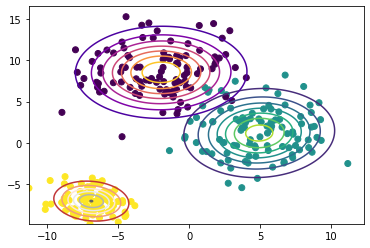

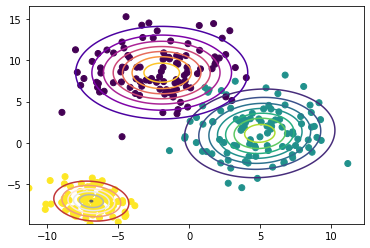

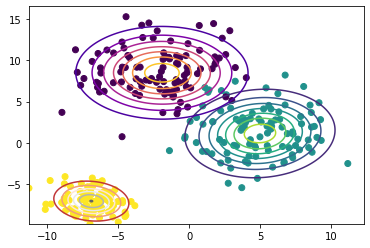

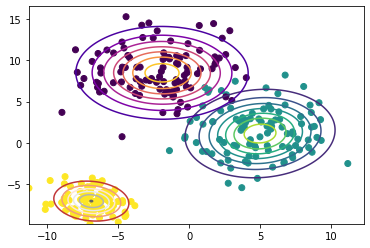

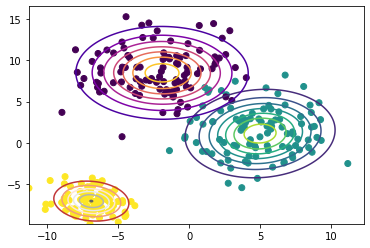

In [40]:
clusters , logs= train(X,3,200,truth=truth)
print("INICIALIZACION ALEATORIA")

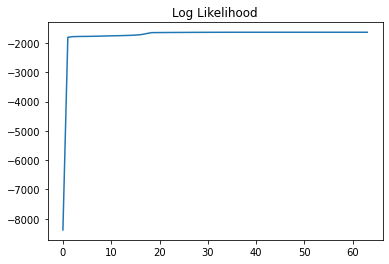

[4.9827724  1.13790631]
[[6.8415832  0.55039753]
 [0.55039753 7.0206192 ]]
[-1.92080819  8.48129499]
[[ 9.09822523 -0.0632902 ]
 [-0.0632902   7.78346008]]
[-6.9010179  -7.02975646]
[[ 1.944149   -0.21987195]
 [-0.21987195  1.62634473]]


In [41]:
#LOG VEROSIMILITUD POR ITERACION
plotear(logs)

for cluster in clusters:
    print(cluster['mu_k'])
    print(cluster['cov_k'])
    print('======================')



#Comparando resultados con Scikit

In [42]:
from sklearn.mixture import GaussianMixture

n_clusters = 3
iteraciones = 100
gmm = GaussianMixture(n_components=n_clusters, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Medias sklearn:\n', gmm.means_)
print('Medias Propias:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))

#no importa el orden

Medias sklearn:
 [[ 4.93330109  1.19325442]
 [-6.90101816 -7.02975659]
 [-1.97511719  8.53659956]]
Medias Propias:
 [[ 4.9827724   1.13790631]
 [-1.92080819  8.48129499]
 [-6.9010179  -7.02975646]]
